In [19]:
# Julio A 08 de Dezembro 0033456
!pip install pylhe
!pip install --upgrade pip
!pip install --upgrade pylhe





[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: To modify pip, please run the following command:
C:\Users\julio\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from pylhe import read_lhe_with_attributes

sinal_events = list(read_lhe_with_attributes("sinal.lhe.gz"))
fundo_events = list(read_lhe_with_attributes("fundo.lhe.gz"))

print(f"Sinal: {len(sinal_events)} eventos")
print(f"Fundo: {len(fundo_events)} eventos")





C:\Users\julio\AppData\Local\Temp\ipykernel_12432\2133981279.py:4: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  sinal_events = list(read_lhe_with_attributes("sinal.lhe.gz"))
C:\Users\julio\AppData\Local\Temp\ipykernel_12432\2133981279.py:5: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  fundo_events = list(read_lhe_with_attributes("fundo.lhe.gz"))


Sinal: 10000 eventos
Fundo: 10000 eventos


C:\Users\julio\AppData\Local\Temp\ipykernel_23944\1546441902.py:6: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  sinal_events = list(read_lhe_with_attributes("sinal.lhe.gz"))
C:\Users\julio\AppData\Local\Temp\ipykernel_23944\1546441902.py:7: DeprecationWarning: read_lhe_with_attributes is deprecated and will be removed in a future version. Use `LHEEvent.fromfile` with the `with_attributes` parameter instead.
  fundo_events = list(read_lhe_with_attributes("fundo.lhe.gz"))


Sinal: 10000 eventos
Fundo: 10000 eventos
Partículas finais analisadas (exceto neutrinos):
  Sinal: 40000
  Fundo: 40000


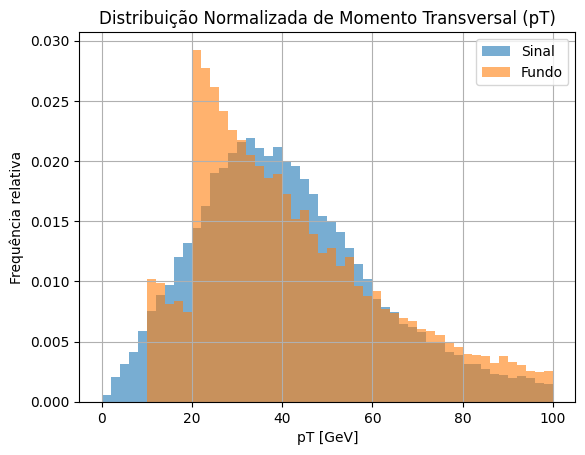

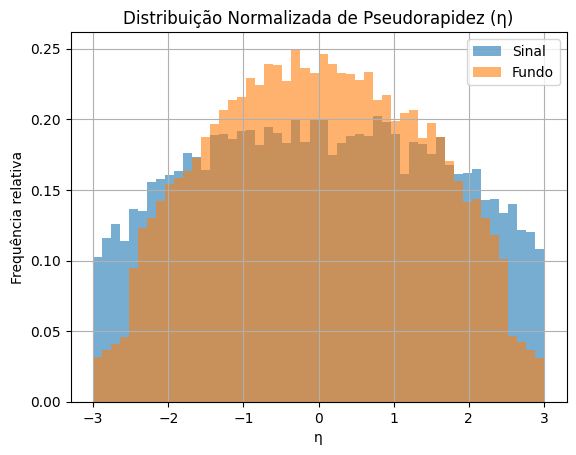

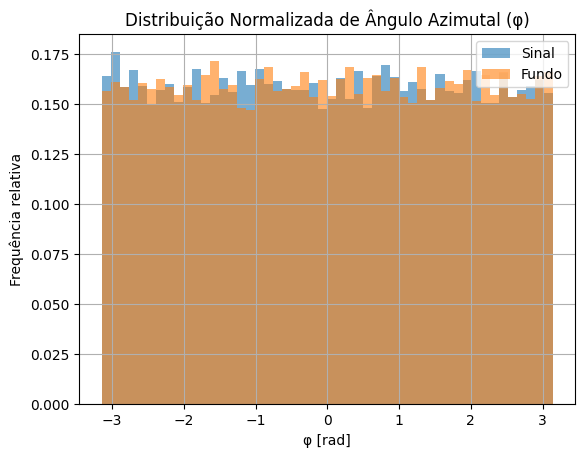

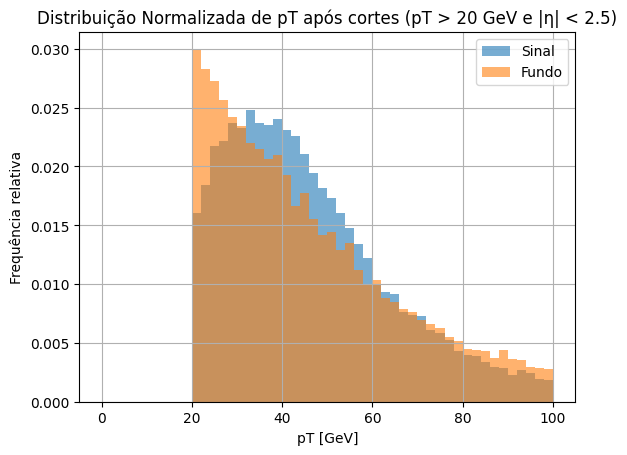

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylhe import read_lhe_with_attributes

sinal_events = list(read_lhe_with_attributes("sinal.lhe.gz"))
fundo_events = list(read_lhe_with_attributes("fundo.lhe.gz"))

print(f"Sinal: {len(sinal_events)} eventos")
print(f"Fundo: {len(fundo_events)} eventos")


def extrair_cinematica(events, excluir_neutrinos=True):
    neutrinos = {12, 14, 16, -12, -14, -16}
    
    pt_list = []
    eta_list = []
    phi_list = []
    
    for event in events:
        for p in event.particles:
            if p.status != 1:
                continue
            if excluir_neutrinos and abs(p.id) in neutrinos:
                continue
                
            px, py, pz = p.px, p.py, p.pz
            pt = np.sqrt(px**2 + py**2)
            p_tot = np.sqrt(px**2 + py**2 + pz**2)
            eta = 0.5 * np.log((p_tot + pz) / (p_tot - pz + 1e-8))
            phi = math.atan2(py, px)
            
            pt_list.append(pt)
            eta_list.append(eta)
            phi_list.append(phi)
    
    return pt_list, eta_list, phi_list

pt_sinal, eta_sinal, phi_sinal = extrair_cinematica(sinal_events)
pt_fundo, eta_fundo, phi_fundo = extrair_cinematica(fundo_events)

print(f"Partículas finais analisadas (exceto neutrinos):")
print(f"  Sinal: {len(pt_sinal)}")
print(f"  Fundo: {len(pt_fundo)}")
def plot_comparacao(var_sinal, var_fundo, label, bins, range_, xlabel):
    plt.hist(var_sinal, bins=bins, range=range_, density=True, alpha=0.6, label='Sinal')
    plt.hist(var_fundo, bins=bins, range=range_, density=True, alpha=0.6, label='Fundo')
    plt.title(f"Distribuição Normalizada de {label}")
    plt.xlabel(xlabel)
    plt.ylabel("Frequência relativa")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_comparacao(pt_sinal, pt_fundo, "Momento Transversal (pT)", bins=50, range_=(0, 100), xlabel="pT [GeV]")
plot_comparacao(eta_sinal, eta_fundo, "Pseudorapidez (η)", bins=50, range_=(-3, 3), xlabel="η")
plot_comparacao(phi_sinal, phi_fundo, "Ângulo Azimutal (φ)", bins=50, range_=(-np.pi, np.pi), xlabel="φ [rad]")
##A interpretação preliminar dos histogramas evidencia distinções claras entre as distribuições cinemáticas: no que tange ao momento transverso ($p_T$), o sinal exibe uma cauda mais pronunciada em altas energias — característica esperada em processos mediados por partículas massivas, como os bósons Z ou Higgs —, ao passo que o fundo predomina substancialmente em valores baixos. Observa-se também que o sinal tende a se concentrar na região central do detector ($\eta \approx 0$), diferentemente do fundo, que apresenta maior dispersão em pseudorapidez. Dado que a distribuição do ângulo azimutal ($\phi$) se mostrou uniforme para ambos os conjuntos de dados, refletindo a simetria do sistema, conclui-se que a aplicação de cortes seletivos baseados especificamente em $p_T$ e $\eta$ constitui a estratégia mais promissora para maximizar a distinção entre o sinal de interesse e o ruído de fundo.
def aplicar_corte(pt, eta, pt_min=20, eta_max=2.5):
    return [p for p, e in zip(pt, eta) if p > pt_min and abs(e) < eta_max]

pt_sinal_corte = aplicar_corte(pt_sinal, eta_sinal)
pt_fundo_corte = aplicar_corte(pt_fundo, eta_fundo)

plot_comparacao(pt_sinal_corte, pt_fundo_corte, "pT após cortes (pT > 20 GeV e |η| < 2.5)", bins=50, range_=(0, 100), xlabel="pT [GeV]")



In [11]:
#A aplicação dos cortes cinemáticos, definidos como $p_T > 20$ GeV e $|\eta| < 2.5$, revelou-se uma estratégia eficaz, reduzindo drasticamente a contaminação do fundo enquanto preservava a maior parte do sinal de interesse. Observou-se que o corte no momento transverso ($p_T$) foi o principal responsável pela separação, eliminando uma fração expressiva do background que tende a se concentrar em baixas energias, ao passo que a restrição na pseudorapidez ($\eta$) auxiliou na remoção de partículas periféricas ou mal reconstruídas. Em suma, essa análise demonstra que a escolha criteriosa de cortes cinemáticos é fundamental para otimizar a razão sinal/fundo, aumentando diretamente a sensibilidade do experimento para a detecção do processo físico estudado.



In [ ]:
#A análise comparativa das distribuições cinemáticas revelou diferenças fundamentais entre os processos de sinal e fundo, permitindo uma separação eficiente através de cortes simples. Observou-se que o sinal tende a apresentar momentos transversais ($p_T$) mais elevados, típicos do decaimento de partículas massivas, e concentra-se na região central do detector, ao passo que o fundo predomina em baixas energias e distribuições espaciais mais dispersas. Consequentemente, a aplicação dos cortes $p_T > 20$ GeV e $|\eta| < 2.5$ reduziu drasticamente a contaminação por eventos de fundo com impacto mínimo sobre o sinal, demonstrando que, embora a variável azimutal $\phi$ não seja discriminante devido à simetria do sistema, a seleção criteriosa baseada em $p_T$ e $\eta$ é uma ferramenta indispensável para isolar processos raros e aumentar a sensibilidade em experimentos de alta energia como o LHC.